# IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# GETTING DATA

In [2]:
import requests
import io

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

# EXTRACTING YEAR AND MONTH AS SEPERATE COLUMNS

In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [7]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

# SOLVING DIFFERNET SCENERIOS

## scenerio 1 : trying to understand the change in average estimated fire area over time

#### Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'

In [8]:
df_new = df.groupby('Year')['Estimated_fire_area'].mean()

#### plotting the data

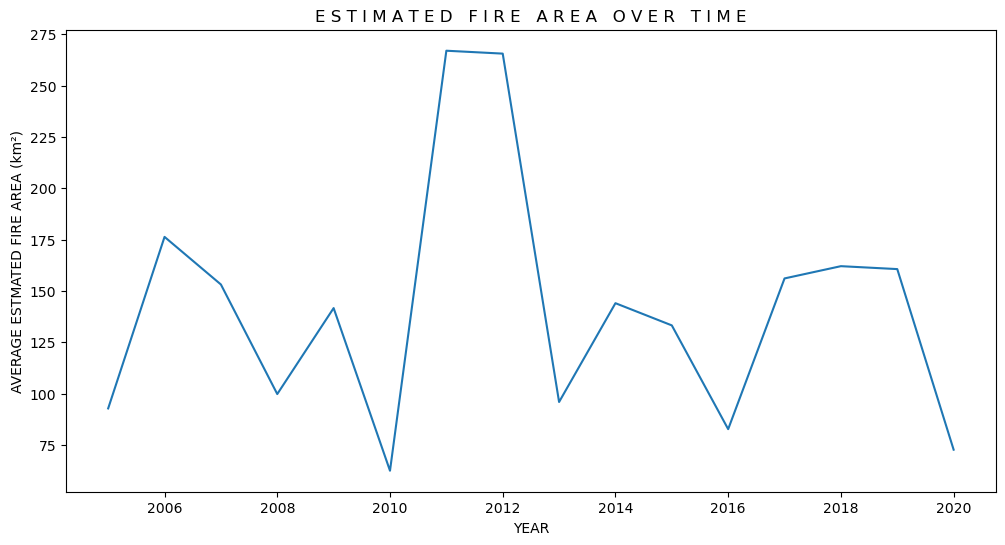

In [9]:
plt.figure(figsize=(12,6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('YEAR')
plt.ylabel('AVERAGE ESTMATED FIRE AREA (km²)')
plt.title('E S T I M A T E D   F I R E   A R E A   O V E R   T I M E')
plt.show()

## scenerio 2 : trying to understand estimated fire area for year grouped together with month

#### Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'

In [10]:
df_new2 = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()

#### plotting the data

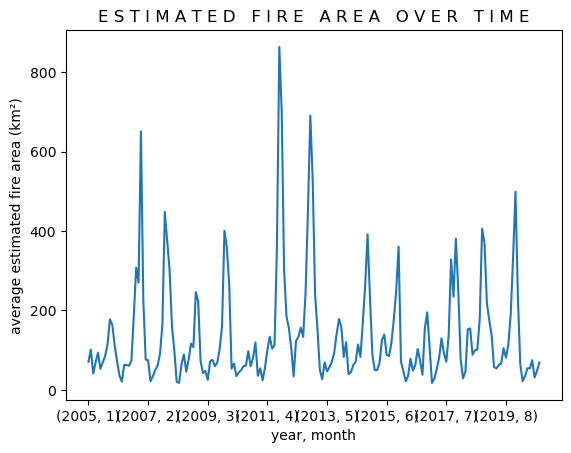

In [11]:
df_new2.plot(x=df_new2.index, y=df_new2.values)
plt.xlabel('year, month')
plt.ylabel('average estimated fire area (km²)')
plt.title('E S T I M A T E D   F I R E   A R E A   O V E R   T I M E')
plt.show()

## scenerio 3 : having an insight on the distribution of mean estimated fire brightness across the regions

#### identifying the  regions in the dataset

In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

#### plotting the data

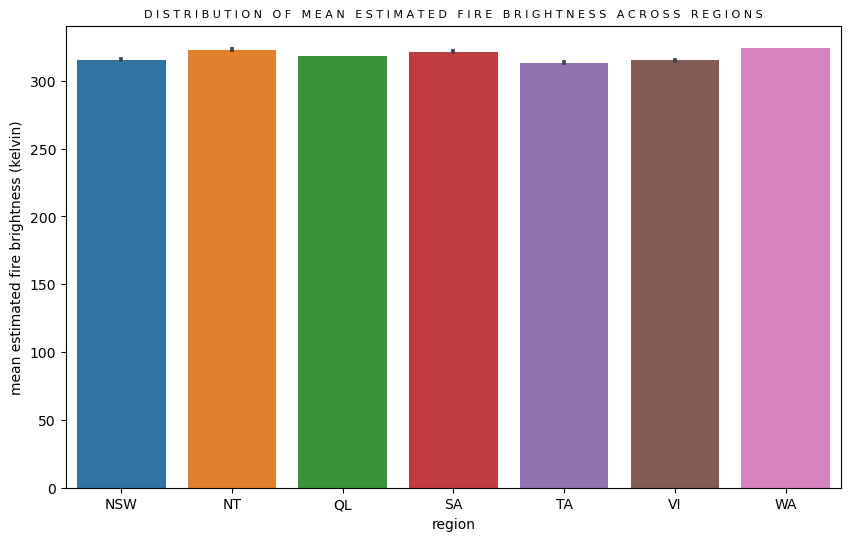

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('region')
plt.ylabel('mean estimated fire brightness (kelvin)')
plt.title('D I S T R I B U T I O N   O F   M E A N   E S T I M A T E D   F I R E   B R I G H T N E S S   A C R O S S   R E G I O N S', fontsize=8)
plt.show()

## scenerio 3 : finding the portion of count of pixels for presumed vegetation fires vary across regions<br> 


#### grouping the data by region and summing the counts

In [15]:
region_counts = df.groupby('Region')['Count'].sum()

#### plotting the data

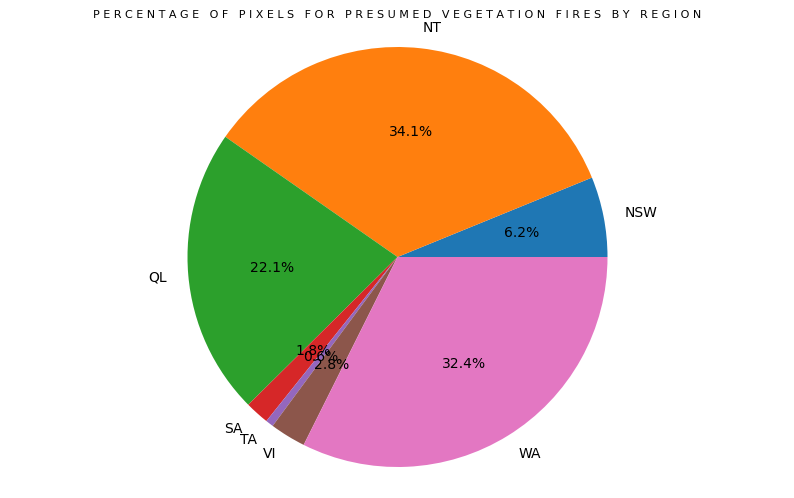

In [19]:
plt.figure(figsize=(10,6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('P E R C E N T A G E   O F   P I X E L S   F O R   P R E S U M E D   V E G E T A T I O N   F I R E S   B Y   R E G I O N', fontsize=8)
plt.axis('equal')
plt.show()

## scenerio 5 : fixing the overlapped percentage numbers

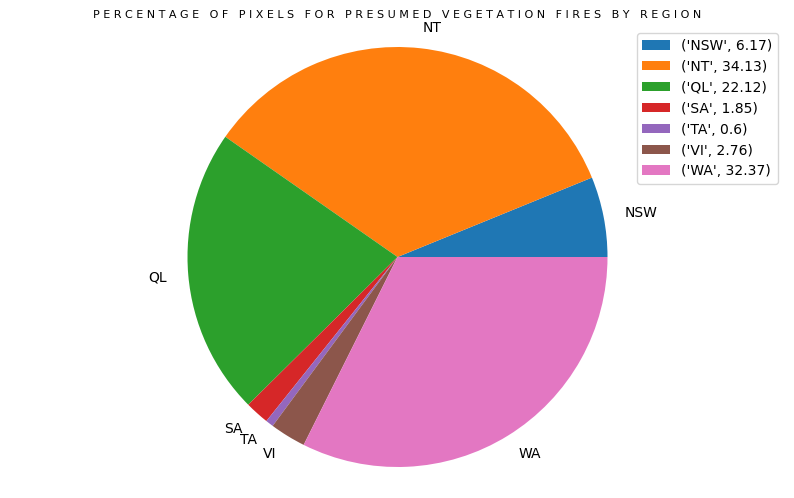

In [18]:
plt.figure(figsize=(10,6))
plt.pie(region_counts, labels=region_counts.index)
plt.title('P E R C E N T A G E   O F   P I X E L S   F O R   P R E S U M E D   V E G E T A T I O N   F I R E S   B Y   R E G I O N', fontsize=8)
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

## scenerio 6 : developing histogram of the mean estimated fire brightness

#### plotting the data

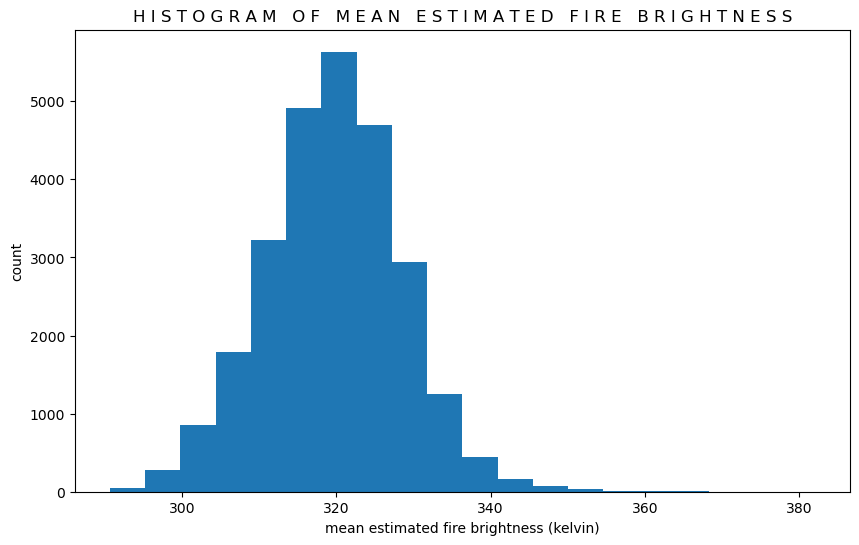

In [20]:
plt.figure(figsize=(10,6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('mean estimated fire brightness (kelvin)')
plt.ylabel('count')
plt.title('H I S T O G R A M   O F   M E A N   E S T I M A T E D   F I R E   B R I G H T N E S S')
plt.show()

## scenerio 7 : passing region as hue to see the distribution of estimated fire brightness across regions

#### plotting the data

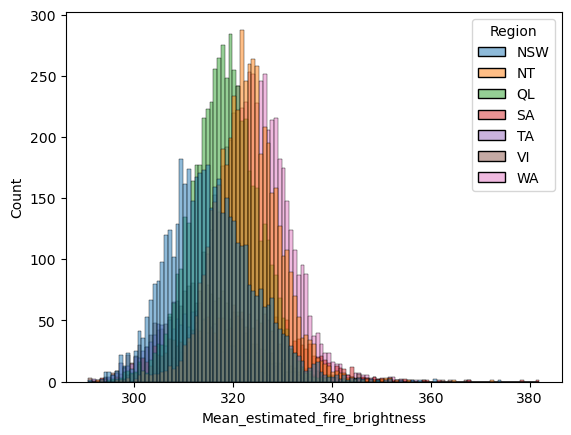

In [21]:
# using sns.histplot to create the histogram
# specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# adding hue='Region' to differentiate the distribution across regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

## scenerio 8 : including parameter "multiple='stack" in the above chart

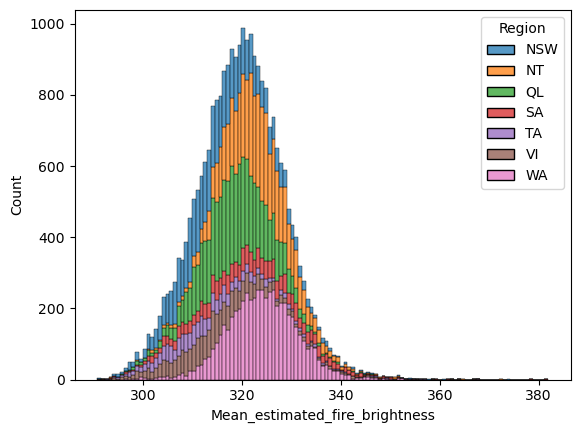

In [25]:
# setting multiple='stack' to stack the histograms for different regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

## scenerio 8 : finding the relation between mean estimated fire radiative power and mean confidence level

#### plotting the data

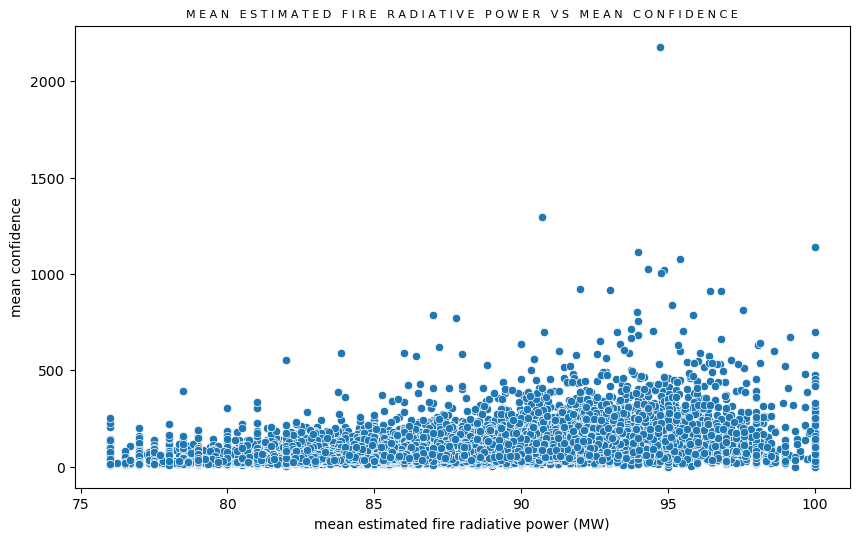

In [27]:
plt.figure(figsize=(10,6))

# using sns.scatterplot to create the scatter plot
# specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('mean estimated fire radiative power (MW)')
plt.ylabel('mean confidence')
plt.title('M E A N   E S T I M A T E D   F I R E   R A D I A T I V E   P O W E R   V S   M E A N   C O N F I D E N C E', fontsize=8)
plt.show()

## scenerio 9 : using folium to mark these affected seven region on the map

#### creating a dataframe containing the regions

In [28]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}

In [29]:
region_data

{'region': ['NSW', 'QL', 'SA', 'TA', 'VI', 'WA', 'NT'],
 'Lat': [-31.8759835,
  -22.1646782,
  -30.5343665,
  -42.035067,
  -36.5986096,
  -25.2303005,
  -19.491411],
 'Lon': [147.2869493,
  144.5844903,
  135.6301212,
  146.6366887,
  144.6780052,
  121.0187246,
  132.550964]}

#### converting above data into dataframe

In [31]:
reg = pd.DataFrame(region_data)

In [32]:
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [33]:
# instantiating a feature group 
aus_reg = folium.map.FeatureGroup()

# Creating a Folium map centered on Australia
aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# looping through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(folium.features.CircleMarker([lat, lng],
                                                  popup = lab,
                                                  radius=5,
                                                  color='red',
                                                  fill=True,
                                                  fill_color='blue',
                                                  fill_opacity=0.6))

# adding incidents to map
aus_map.add_child(aus_reg)